## **Image Classification on CIFAR-10 Image Data**

In [ ]:
import numpy as np
import keras
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers, optimizers, regularizers
from keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
import skimage.transform
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import * 
from tensorflow.keras.applications import InceptionV3, VGG16, ResNet50

In [ ]:
# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Transform labels to one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# testing with imagedatagen to see if there is any improvement:
datagen = ImageDataGenerator(
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

# **LeNet Implementation** 

In [ ]:
LeNetmodel = Sequential()

LeNetmodel.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,3), padding="same"))
LeNetmodel.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

LeNetmodel.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))
LeNetmodel.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

#Flatten the CNN output so that we can connect it with fully connected layers
LeNetmodel.add(layers.Flatten())

LeNetmodel.add(Dense(120, activation='tanh'))
LeNetmodel.add(Dense(84, activation='tanh'))
LeNetmodel.add(Dense(10, activation="softmax"))

# Compile the model
LeNetmodel.compile(loss= 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
LeNetmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d_2 (Average (None, 31, 31, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               324600    
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [ ]:
datagen_LeNet = LeNetmodel.fit(datagen.flow(x_train, y_train, batch_size=128),
                        steps_per_epoch=len(x_train) / 128, epochs = 50, validation_data=(x_test, y_test), verbose = 1)

Epoch 1/50
391/390 [==============================] - 29s 74ms/step - loss: 2.0778 - accuracy: 0.2407 - val_loss: 1.8217 - val_accuracy: 0.3410
Epoch 2/50
391/390 [==============================] - 28s 73ms/step - loss: 1.8131 - accuracy: 0.3480 - val_loss: 2.0367 - val_accuracy: 0.2740
Epoch 3/50
391/390 [==============================] - 29s 73ms/step - loss: 1.7329 - accuracy: 0.3790 - val_loss: 1.6572 - val_accuracy: 0.4058
Epoch 4/50
391/390 [==============================] - 29s 74ms/step - loss: 1.6918 - accuracy: 0.3950 - val_loss: 1.6529 - val_accuracy: 0.4024
Epoch 5/50
391/390 [==============================] - 29s 74ms/step - loss: 1.6645 - accuracy: 0.4040 - val_loss: 1.5627 - val_accuracy: 0.4418
Epoch 6/50
391/390 [==============================] - 28s 73ms/step - loss: 1.6326 - accuracy: 0.4145 - val_loss: 1.5295 - val_accuracy: 0.4549
Epoch 7/50
391/390 [==============================] - 29s 73ms/step - loss: 1.6027 - accuracy: 0.4242 - val_loss: 1.6941 - val_accuracy:

Text(0, 0.5, 'acc')

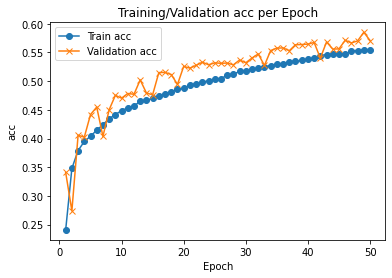

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + datagen_LeNet.history['accuracy'], 'o-')
ax.plot([None] + datagen_LeNet.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

# **Keras VGG-16 (No Transfer Learning)**

In [ ]:
# keras.applications implementations of models
input_shape = (32, 32, 3)
X_input = Input(input_shape)

VGG16no_tf = Sequential()
VGG16no_tf.add(VGG16(include_top = False, weights = None, input_tensor = X_input, input_shape = input_shape))
VGG16no_tf.add(Flatten())
VGG16no_tf.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
VGG16no_tf.add(layers.BatchNormalization())
VGG16no_tf.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
VGG16no_tf.add(layers.BatchNormalization())
VGG16no_tf.add(Dense(10, activation = 'softmax'))

VGG16no_tf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
VGG16no_tf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              1050624   
_________________________________________________________________
batch_normalization_94 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_95 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
plot_untrained_VGG = VGG16no_tf.fit(datagen.flow(x_train, y_train, batch_size=128), 
                                              steps_per_epoch=len(x_train) / 128, epochs = 50, validation_data=(x_test, y_test), verbose = 1)

Epoch 1/50
391/390 [==============================] - 24s 61ms/step - loss: 2.6921 - accuracy: 0.1963 - val_loss: 3.4372 - val_accuracy: 0.1091
Epoch 2/50
391/390 [==============================] - 23s 59ms/step - loss: 2.1360 - accuracy: 0.2655 - val_loss: 2.6236 - val_accuracy: 0.2810
Epoch 3/50
391/390 [==============================] - 23s 59ms/step - loss: 1.8437 - accuracy: 0.3403 - val_loss: 2.5494 - val_accuracy: 0.2334
Epoch 4/50
391/390 [==============================] - 23s 58ms/step - loss: 1.6551 - accuracy: 0.4168 - val_loss: 1.6767 - val_accuracy: 0.4081
Epoch 5/50
391/390 [==============================] - 23s 58ms/step - loss: 1.4829 - accuracy: 0.4834 - val_loss: 1.7173 - val_accuracy: 0.4728
Epoch 6/50
391/390 [==============================] - 23s 58ms/step - loss: 1.3249 - accuracy: 0.5637 - val_loss: 1.4834 - val_accuracy: 0.5462
Epoch 7/50
391/390 [==============================] - 22s 57ms/step - loss: 1.1983 - accuracy: 0.6123 - val_loss: 1.5846 - val_accuracy:

Text(0, 0.5, 'acc')

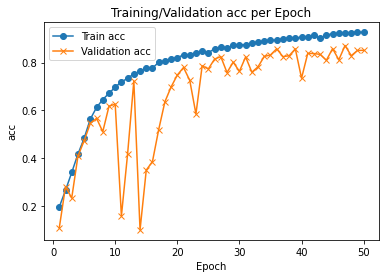

In [ ]:
f1, ax1 = plt.subplots()
ax1.plot([None] + plot_untrained_VGG.history['accuracy'], 'o-')
ax1.plot([None] + plot_untrained_VGG.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax1.legend(['Train acc', 'Validation acc'], loc = 0)
ax1.set_title('Training/Validation acc per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('acc')

# **Keras Inception V3 (No Transfer Learning)**

In [ ]:
# CODE BLOCK REQUIRED TO RESIZE IMAGES

# for x_train:
newImages = []

for image in x_train:
  newImage = skimage.transform.resize(image, (75, 75, 3), mode='constant')
  newImages.append(newImage)

newImages = np.stack(newImages, axis=0)

inception_xtrain = newImages

# for x_test:
newImages = []

for image in x_test:
  newImage = skimage.transform.resize(image, (75, 75, 3), mode='constant')
  newImages.append(newImage)

newImages = np.stack(newImages, axis=0)

inception_xtest = newImages

In [ ]:
InceptionDatagen = ImageDataGenerator(
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [ ]:
# compute quantities required for featurewise normalization
InceptionDatagen.fit(inception_xtrain)

In [ ]:
input_shape = (75, 75, 3)
X_input = Input(input_shape)

inceptionModel = Sequential()
inceptionModel.add(InceptionV3(include_top = False, weights = None, input_tensor = X_input, input_shape = input_shape))
inceptionModel.add(GlobalAveragePooling2D())
inceptionModel.add(Dense(10, activation = 'softmax'))
inceptionModel.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
inceptionModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 1, 1, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 21,823,274
Trainable params: 21,788,842
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
plot_Inception = inceptionModel.fit(InceptionDatagen.flow(inception_xtrain, y_train, batch_size=128),
                        steps_per_epoch=len(x_train) / 128, epochs = 20, validation_data=(inception_xtest, y_test), verbose = 1)

Epoch 1/20
391/390 [==============================] - 117s 300ms/step - loss: 1.6347 - accuracy: 0.4115 - val_loss: 1.8148 - val_accuracy: 0.4120
Epoch 2/20
391/390 [==============================] - 111s 284ms/step - loss: 1.4097 - accuracy: 0.5047 - val_loss: 2.2143 - val_accuracy: 0.3736
Epoch 3/20
391/390 [==============================] - 111s 284ms/step - loss: 1.3246 - accuracy: 0.5395 - val_loss: 1.3328 - val_accuracy: 0.5230
Epoch 4/20
391/390 [==============================] - 111s 284ms/step - loss: 1.1833 - accuracy: 0.5936 - val_loss: 2.1393 - val_accuracy: 0.5069
Epoch 5/20
391/390 [==============================] - 111s 284ms/step - loss: 1.1760 - accuracy: 0.6076 - val_loss: 1048.6116 - val_accuracy: 0.1000
Epoch 6/20
391/390 [==============================] - 111s 284ms/step - loss: 1.0276 - accuracy: 0.6408 - val_loss: 1.0615 - val_accuracy: 0.6429
Epoch 7/20
391/390 [==============================] - 111s 284ms/step - loss: 0.8108 - accuracy: 0.7178 - val_loss: 0.778

Text(0, 0.5, 'acc')

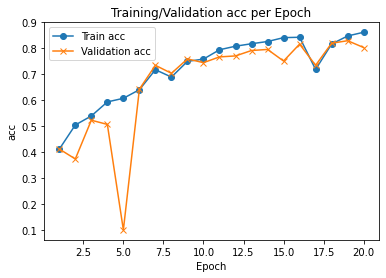

In [ ]:
f1, ax1 = plt.subplots()
ax1.plot([None] + plot_Inception.history['accuracy'], 'o-')
ax1.plot([None] + plot_Inception.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax1.legend(['Train acc', 'Validation acc'], loc = 0)
ax1.set_title('Training/Validation acc per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('acc')

# **Keras Inception V3 (Transfer Learning)**

In [ ]:
input_shape = (75, 75, 3)
X_input = Input(input_shape)

inceptionModeltf = Sequential()
inceptionModeltf.add(InceptionV3(include_top = False, weights = 'imagenet', input_tensor = X_input, input_shape = input_shape))
inceptionModeltf.add(GlobalAveragePooling2D())
inceptionModeltf.add(Dense(10, activation = 'softmax'))
inceptionModeltf.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
inceptionModeltf.layers[0].trainable = False
inceptionModeltf.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 1, 1, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 21,823,274
Trainable params: 20,490
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
plot_pretrained_Inception = inceptionModeltf.fit(InceptionDatagen.flow(inception_xtrain, y_train, batch_size=128),
                        steps_per_epoch=len(x_train) / 128, epochs = 20, validation_data=(inception_xtest, y_test), verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
391/390 [==============================] - 70s 180ms/step - loss: 0.8723 - accuracy: 0.7113 - val_loss: 0.9098 - val_accuracy: 0.7062
Epoch 2/20
391/390 [==============================] - 68s 175ms/step - loss: 0.6413 - accuracy: 0.7897 - val_loss: 1.0884 - val_accuracy: 0.6597
Epoch 3/20
391/390 [==============================] - 68s 174ms/step - loss: 0.4806 - accuracy: 0.8390 - val_loss: 0.4755 - val_accuracy: 0.8380
Epoch 4/20
391/390 [==============================] - 68s 174ms/step - loss: 0.3856 - accuracy: 0.8695 - val_loss: 0.4793 - val_accuracy: 0.8450
Epoch 5/20
391/390 [==============================] - 68s 174ms/step - loss: 0.3800 - accuracy: 0.8721 - val_loss: 0.6472 - val_accuracy: 0.7893
Epoch 6/20
391/390 [==============================] - 68s 175ms/step - loss: 0.3202 - accuracy: 0.8917 - val_loss: 0.7950 - val_accuracy: 0.7654
Epoch 7/20
391/390 [==============================] - 

Text(0, 0.5, 'acc')

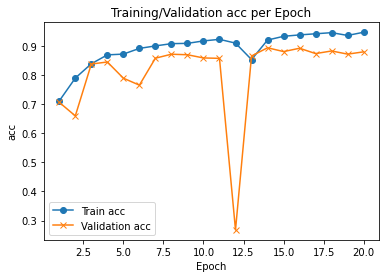

In [ ]:
f1, ax1 = plt.subplots()
ax1.plot([None] + plot_pretrained_Inception.history['accuracy'], 'o-')
ax1.plot([None] + plot_pretrained_Inception.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax1.legend(['Train acc', 'Validation acc'], loc = 0)
ax1.set_title('Training/Validation acc per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('acc')

# **AlexNet**

In [ ]:
def AlexNetModel():
    #Instantiate an empty model
    AlexNet = Sequential()

    # LAYER 1
    AlexNet.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(32,32,3), padding="same"))
    ## pooling
    AlexNet.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same"))
    AlexNet.add(layers.BatchNormalization())

    # LAYER 2
    AlexNet.add(layers.ZeroPadding2D(padding=(2, 2)))
    AlexNet.add(layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"))
    ## pooling
    AlexNet.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same"))
    AlexNet.add(layers.BatchNormalization())

    # LAYER 3
    AlexNet.add(layers.ZeroPadding2D(padding=(1, 1)))
    AlexNet.add(layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))

    # LAYER 4
    AlexNet.add(layers.ZeroPadding2D(padding=(1, 1)))
    AlexNet.add(layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))

    # LAYER 5
    AlexNet.add(layers.ZeroPadding2D(padding=(1, 1)))
    AlexNet.add(layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
    ## pooling
    AlexNet.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same"))

    # Flatten the CNN output so that we can connect it with fully connected layers
    AlexNet.add(layers.Flatten())

    # FC6 Fully Connected Layer
    AlexNet.add(layers.Dense(4096, activation='relu'))
    AlexNet.add(layers.Dropout(0.5))

    # FC7 Fully Connected Layer
    AlexNet.add(layers.Dense(4096, activation='relu'))
    AlexNet.add(layers.Dropout(0.5))

    # Output Layer with softmax activation
    AlexNet.add(layers.Dense(10, activation="softmax"))

    # Compile the model
    AlexNet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=["accuracy"])

    return AlexNet

In [ ]:
AlexNet = AlexNetModel()
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 4, 96)          384       
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)        

In [ ]:
alexnet = AlexNet.fit_generator(datagen.flow(x_train, y_train, batch_size=128), 
                           steps_per_epoch=len(x_train) / 128, epochs = 50, validation_data=(x_test, y_test), verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
391/390 [==============================] - 31s 79ms/step - loss: 1.8906 - accuracy: 0.2928 - val_loss: 1.8446 - val_accuracy: 0.3349
Epoch 2/50
391/390 [==============================] - 30s 77ms/step - loss: 1.5718 - accuracy: 0.4152 - val_loss: 1.9664 - val_accuracy: 0.3404
Epoch 3/50
391/390 [==============================] - 30s 77ms/step - loss: 1.4380 - accuracy: 0.4720 - val_loss: 1.3400 - val_accuracy: 0.5068
Epoch 4/50
391/390 [==============================] - 31s 78ms/step - loss: 1.3466 - accuracy: 0.5134 - val_loss: 1.4493 - val_accuracy: 0.4815
Epoch 5/50
391/390 [==============================] - 30s 77ms/step - loss: 1.2805 - accuracy: 0.5385 - val_loss: 1.2952 - val_accuracy: 0.5253
Epoch 6/50
391/390 [==============================] - 31s 78ms/step - loss: 1.2310 - accuracy: 0.5575 - val_loss: 1.7538 - val_accuracy: 0.4428
Epoch 7/50
391/390 [==============================] - 30s 77

Text(0, 0.5, 'acc')

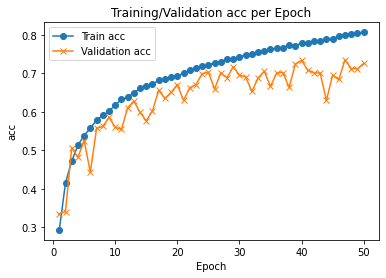

In [ ]:
f1, ax1 = plt.subplots()
ax1.plot([None] + alexnet.history['accuracy'], 'o-')
ax1.plot([None] + alexnet.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax1.legend(['Train acc', 'Validation acc'], loc = 0)
ax1.set_title('Training/Validation acc per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('acc')

# **Resnet (Transfer Learning)**

In [ ]:
ResNet = Sequential()

ResNet.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
ResNet.add(Flatten())
ResNet.add(BatchNormalization())
ResNet.add(Dense(2048, activation='relu'))
ResNet.add(BatchNormalization())
ResNet.add(Dense(1024, activation='relu'))
ResNet.add(BatchNormalization())
ResNet.add(Dense(10, activation='softmax'))

ResNet.layers[0].trainable = False

ResNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ResNet.summary()

94773248/94765736 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________

In [ ]:
resnet_pre = ResNet.fit(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch=len(x_train) / 128, epochs = 50, validation_data=(x_test, y_test), verbose = 1)

Epoch 1/50
391/390 [==============================] - 41s 104ms/step - loss: 1.4756 - accuracy: 0.5097 - val_loss: 1.2212 - val_accuracy: 0.5787
Epoch 2/50
391/390 [==============================] - 39s 100ms/step - loss: 1.2249 - accuracy: 0.5707 - val_loss: 1.1429 - val_accuracy: 0.6069
Epoch 3/50
391/390 [==============================] - 39s 100ms/step - loss: 1.1638 - accuracy: 0.5908 - val_loss: 1.1165 - val_accuracy: 0.6111
Epoch 4/50
391/390 [==============================] - 39s 100ms/step - loss: 1.1278 - accuracy: 0.6036 - val_loss: 1.0998 - val_accuracy: 0.6223
Epoch 5/50
391/390 [==============================] - 40s 102ms/step - loss: 1.0924 - accuracy: 0.6158 - val_loss: 1.0955 - val_accuracy: 0.6190
Epoch 6/50
391/390 [==============================] - 40s 101ms/step - loss: 1.0653 - accuracy: 0.6246 - val_loss: 1.1060 - val_accuracy: 0.6193
Epoch 7/50
391/390 [==============================] - 40s 102ms/step - loss: 1.0468 - accuracy: 0.6332 - val_loss: 1.0735 - val_ac

Text(0, 0.5, 'acc')

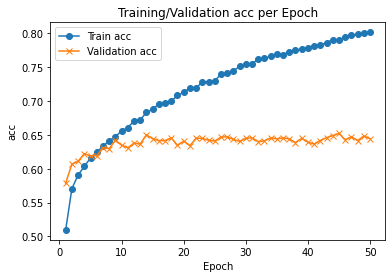

In [ ]:
f1, ax1 = plt.subplots()
ax1.plot([None] + resnet_pre.history['accuracy'], 'o-')
ax1.plot([None] + resnet_pre.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax1.legend(['Train acc', 'Validation acc'], loc = 0)
ax1.set_title('Training/Validation acc per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('acc')

# **Resnet (No Transfer Learning)**

In [ ]:
ResNet_NonPre = Sequential()

ResNet_NonPre.add(ResNet50(include_top=False, pooling='avg', weights=None))
ResNet_NonPre.add(Flatten())
ResNet_NonPre.add(BatchNormalization())
ResNet_NonPre.add(Dense(2048, activation='relu'))
ResNet_NonPre.add(BatchNormalization())
ResNet_NonPre.add(Dense(1024, activation='relu'))
ResNet_NonPre.add(BatchNormalization())
ResNet_NonPre.add(Dense(10, activation='softmax'))

ResNet_NonPre.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ResNet_NonPre.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_100 (Bat (None, 2048)              8192      
_________________________________________________________________
dense_7 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_101 (Bat (None, 2048)              8192      
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_102 (Bat (None, 1024)             

In [ ]:
plot_nonpre_resnet = ResNet_NonPre.fit(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch=len(x_train) / 128, epochs = 50, validation_data=(x_test, y_test), verbose = 1)

Epoch 1/50
391/390 [==============================] - 71s 182ms/step - loss: 1.8709 - accuracy: 0.3441 - val_loss: 1.6725 - val_accuracy: 0.3940
Epoch 2/50
391/390 [==============================] - 69s 176ms/step - loss: 1.5104 - accuracy: 0.4575 - val_loss: 1.6322 - val_accuracy: 0.4178
Epoch 3/50
391/390 [==============================] - 69s 176ms/step - loss: 1.4279 - accuracy: 0.4923 - val_loss: 6.7617 - val_accuracy: 0.3174
Epoch 4/50
391/390 [==============================] - 69s 176ms/step - loss: 1.4070 - accuracy: 0.5023 - val_loss: 1.6032 - val_accuracy: 0.4228
Epoch 5/50
391/390 [==============================] - 69s 176ms/step - loss: 1.3077 - accuracy: 0.5380 - val_loss: 1.3938 - val_accuracy: 0.5075
Epoch 6/50
391/390 [==============================] - 69s 176ms/step - loss: 1.1855 - accuracy: 0.5809 - val_loss: 1.6202 - val_accuracy: 0.4587
Epoch 7/50
391/390 [==============================] - 69s 176ms/step - loss: 1.1125 - accuracy: 0.6067 - val_loss: 1.1900 - val_ac

Text(0, 0.5, 'acc')

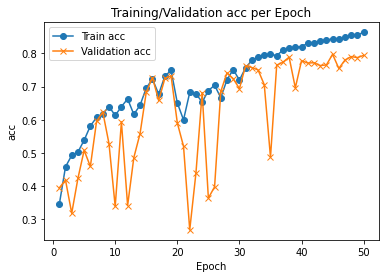

In [ ]:
f1, ax1 = plt.subplots()
ax1.plot([None] + plot_nonpre_resnet.history['accuracy'], 'o-')
ax1.plot([None] + plot_nonpre_resnet.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax1.legend(['Train acc', 'Validation acc'], loc = 0)
ax1.set_title('Training/Validation acc per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('acc')